In [1]:
import networkx as nx
import numpy as np
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt
from multiprocessing import Pool
import itertools
%matplotlib inline

## Load facebook network from file.

In [2]:
# Loading facebook data
fb = nx.read_edgelist("../facebook_combined.txt")

# Square lattice
L = 64
N_lattice = L * L
lattice = nx.grid_2d_graph(L, L, periodic=True)
lattice = nx.convert_node_labels_to_integers(lattice)

N = 4039
m = 3
barabasi = nx.barabasi_albert_graph(N, m)
barabasi = nx.convert_node_labels_to_integers(barabasi)

erdos = nx.erdos_renyi_graph(N, 0.01)
erdos = nx.convert_node_labels_to_integers(erdos)

In [5]:
fb_edges = len(fb.edges())
lattice_edges = len(lattice.edges())
barabasi_edges = len(barabasi.edges())
erdos_edges = len(erdos.edges())

print('Facebook number of edges:', fb_edges)
print('Lattice number of edges:', lattice_edges)
print('Barabasi number of edges:', barabasi_edges)
print('Erdos number of edges:', erdos_edges)

Facebook number of edges: 88234
Lattice number of edges: 8192
Barabasi number of edges: 12108
Erdos number of edges: 81134


### Computing degree assortativity of the graph.
### Assortativity measures the similarity of connections in the graph with respect to the node degree.
https://en.wikipedia.org/wiki/Assortativity

In [6]:
fb_assortativity = nx.degree_assortativity_coefficient(fb)
lattice_assortativity = nx.degree_assortativity_coefficient(lattice)
barabasi_assortativity = nx.degree_assortativity_coefficient(barabasi)
erdos_assortativity = nx.degree_assortativity_coefficient(erdos)
print('Facebook assortativity', fb_assortativity)
print('Lattice assortativity', lattice_assortativity)
print('Barabasi assortativity', barabasi_assortativity)
print('Erdos assortativity', erdos_assortativity)

/home/mario/anaconda3/lib/python3.7/site-packages/networkx/algorithms/assortativity/correlation.py:288: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / numpy.sqrt(vara * varb)


Facebook assortativity 0.0635772291856496
Lattice assortativity nan
Barabasi assortativity -0.042977976768786036
Erdos assortativity -0.002768970577572868


### Degree Pearson correlation coefficient is the same as degree assortativity coefficient but uses the potentially faster Pearson function

In [7]:
fb_assortativity_pearson = nx.degree_pearson_correlation_coefficient(fb)
lattice_assortativity_pearson = nx.degree_pearson_correlation_coefficient(lattice)
barabasi_assortativity_pearson = nx.degree_pearson_correlation_coefficient(barabasi)
erdos_assortativity_pearson = nx.degree_pearson_correlation_coefficient(erdos)

print('Facebook pearson assortativity', fb_assortativity_pearson)
print('Lattice pearson assortativity', lattice_assortativity_pearson)
print('Barabasi pearson assortativity', barabasi_assortativity_pearson)
print('Erdos pearson assortativity', erdos_assortativity_pearson)

/home/mario/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


Facebook pearson assortativity 0.06357722918564916
Lattice pearson assortativity nan
Barabasi pearson assortativity -0.04297797676878602
Erdos pearson assortativity -0.002768970577577769


## Analysis of Structural Properties

### Node degree, network minimum, maximum and average degree, degree distribution

In [8]:
fb_degrees = [deg for node, deg in nx.degree(fb)]
lattice_degrees = [deg for node, deg in nx.degree(lattice)]
barabasi_degrees = [deg for node, deg in nx.degree(barabasi)]
erdos_degrees = [deg for node, deg in nx.degree(erdos)]

In [15]:
fb_degree_one = [node for node, deg in nx.degree(fb) if deg > 200]

In [16]:
len(fb_degree_one)

40

In [9]:
# kmin - minimum degree
fb_kmin = np.min(fb_degrees)
lattice_kmin = np.min(lattice_degrees)
barabasi_kmin = np.min(barabasi_degrees)
erdos_kmin = np.min(erdos_degrees)
print('Facebook minimum degree',fb_kmin)
print('Lattice minimum degree',lattice_kmin)
print('Barabasi minimum degree',barabasi_kmin)
print('Erdos minimum degree',erdos_kmin)

# kmax - maximum degree
fb_kmax = np.max(fb_degrees)
lattice_kmax = np.max(lattice_degrees)
barabasi_kmax = np.max(barabasi_degrees)
erdos_kmax = np.max(erdos_degrees)
print('Facebook maximum degree',fb_kmax)
print('Lattice maximum degree',lattice_kmax)
print('Barabasi maximum degree',barabasi_kmax)
print('Erdos maximum degree',erdos_kmax)

# kavg - average degree of the network
fb_kavg = np.mean(fb_degrees)
lattice_kavg = np.mean(lattice_degrees)
barabasi_kavg = np.mean(barabasi_degrees)
erdos_kavg = np.mean(erdos_degrees)
print('Facebook average degree',fb_kavg)
print('Lattice average degree',lattice_kavg)
print('Barabasi average degree',barabasi_kavg)
print('Erdos average degree',erdos_kavg)

Facebook minimum degree 1
Lattice minimum degree 4
Barabasi minimum degree 3
Erdos minimum degree 19
Facebook maximum degree 1045
Lattice maximum degree 4
Barabasi maximum degree 219
Erdos maximum degree 70
Facebook average degree 43.69101262688784
Lattice average degree 4.0
Barabasi average degree 5.995543451349344
Erdos average degree 40.17529091359248


### Degree distribution: helps us understand connectivity trends in networks and how edges are distributed among nodes (does everyone have similar number of connections, or do we have hubs, nodes with significantly higher number of connections?)

In [11]:
def degree_distr(net):
    degrees = dict(net.degree()) 
    hist = list(Counter(degrees.values()).items()) 
    hist.sort(key=lambda x:x[0])
    hist = np.array(hist)
    return hist

### Plotting the degree distribution 

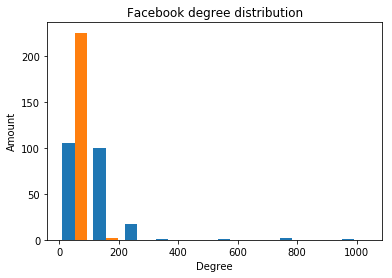

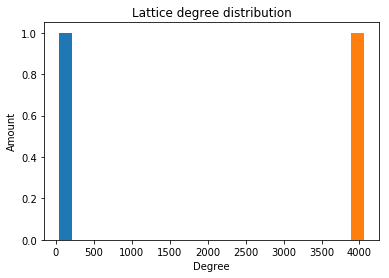

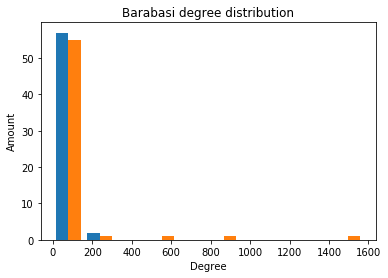

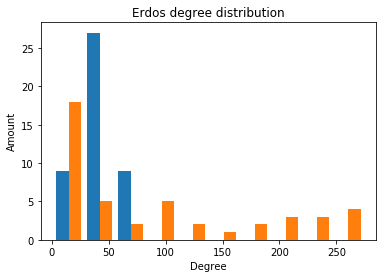

In [32]:
fb_hist = degree_distr(fb)
# x_ticks = np.linspace(1, 1000, 10)
# plt.xticks(x_ticks)
plt.title('Facebook degree distribution')
plt.xlabel('Degree')
plt.ylabel('Amount')
plt.hist(fb_hist)
plt.show()


lattice_hist = degree_distr(lattice)
# x_ticks = np.linspace(1, 1000, 10)
# plt.xticks(x_ticks)
plt.title('Lattice degree distribution')
plt.xlabel('Degree')
plt.ylabel('Amount')
plt.hist(lattice_hist)
plt.show()


barabasi_hist = degree_distr(barabasi)
# x_ticks = np.linspace(1, 1000, 10)
# plt.xticks(x_ticks)
plt.title('Barabasi degree distribution')
plt.xlabel('Degree')
plt.ylabel('Amount')
plt.hist(barabasi_hist)
plt.show()


erdos_hist = degree_distr(erdos)
# x_ticks = np.linspace(1, 1000, 10)
# plt.xticks(x_ticks)
plt.title('Erdos degree distribution')
plt.xlabel('Degree')
plt.ylabel('Amount')
plt.hist(erdos_hist)
plt.show()

### Get number of degrees with respect a condition (e.g. here greater that 200)

In [12]:
num_degrees_more_than_200 = np.sum( [d > 10 for d in degrees] )
print("There are", num_degrees_more_than_200, "nodes with degree more that 200")

NameError: name 'degrees' is not defined

### Paths on Networks: average path length, shortest path, longest path

In [ ]:
# find shortest path in directed & undirected network
path = nx.shortest_path(fb)
# nx.shortest_path(g,'b','d', weighted=True)

### Centrality measures
### Computing the degree centrality for nodes.
### The degree centrality for a node v is the fraction of nodes it is connected to.
https://en.wikipedia.org/wiki/Centrality

In [ ]:
# degree centrality
fb_degree_centr = nx.degree_centrality(fb)
lattice_degree_centr = nx.degree_centrality(lattice)
barabasi_degree_centr = nx.degree_centrality(barabasi)
erdos_degree_centr = nx.degree_centrality(erdos)
print('Facebook degree centrality', fb_degree_centr)
print('Lattice degree centrality', lattice_degree_centr)
print('Barabasi degree centrality', barabasi_degree_centr)
print('Erdos degree centrality', erdos_degree_centr)

# betweenness centrality of network
fb_betweenness_centr = nx.betweenness_centrality(fb)
lattice_betweenness_centr = nx.betweenness_centrality(lattice)
barabasi_betweenness_centr = nx.betweenness_centrality(barabasi)
erdos_betweenness_centr = nx.betweenness_centrality(erdos)
print('Facebook betweeness centrality', fb_betweenness_centr)
print('Lattice betweeness centrality', lattice_betweenness_centr)
print('Barabasi betweeness centrality', barabasi_betweenness_centr)
print('Erdos betweeness centrality', erdos_betweenness_centr)


# closeness centrality of network
fb_closeness_centr = nx.closeness_centrality(fb)
lattice_closeness_centr = nx.closeness_centrality(lattice)
barabasi_closeness_centr = nx.closeness_centrality(barabasi)
erdos_closeness_centr = nx.closeness_centrality(erdos)
print('Facebook closeness centrality', fb_closeness_centr)
print('Lattice closeness centrality', lattice_closeness_centr)
print('Barabasi closeness centrality', barabasi_closeness_centr)
print('Erdos closeness centrality', erdos_closeness_centr)

# eigenvector centrality of network
fb_eigenvector_centr = nx.eigenvector_centrality(fb)
lattice_eigenvector_centr = nx.eigenvector_centrality(lattice)
barabasi_eigenvector_centr = nx.eigenvector_centrality(barabasi)
erdos_eigenvector_centr = nx.eigenvector_centrality(erdos)
print('Facebook eigenvector centrality', fb_eigenvector_centr)
print('Lattice eigenvector centrality', lattice_eigenvector_centr)
print('Barabasi eigenvector centrality', barabasi_eigenvector_centr)
print('Erdos eigenvector centrality', erdos_eigenvector_centr)

### Get node with the biggest degree centrality

In [ ]:
max(centr, key=centr.get)

### Assortativity measures the similarity of connections in the graph with respect to the node degree.

* Pearson correlation coefficient [-1; 1]
* social networks are highly assortative (homophily): high degree nodes connect to other high degree nodes
* technological are disassortative: high degree nodes connect to low degree nodes

### Assortativity computed based on:
* degree
* attribute

In [126]:
# Compute degree assortativity of graph.
nx.degree_assortativity_coefficient(fb)


0.0635772291856496

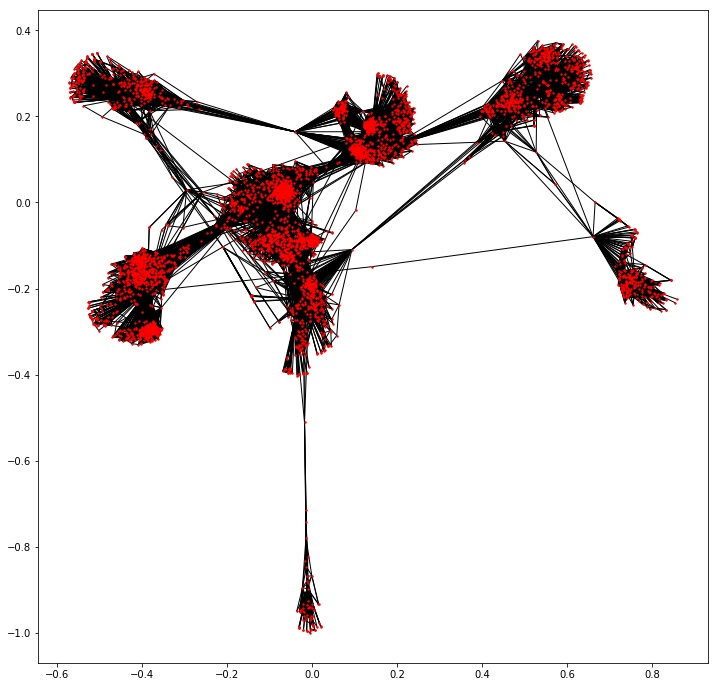

In [36]:
sp = nx.spring_layout(fb)
plt.figure(figsize=(12,12))
nx.draw_networkx(fb, pos=sp, with_labels=False, node_size=2)
plt.show()

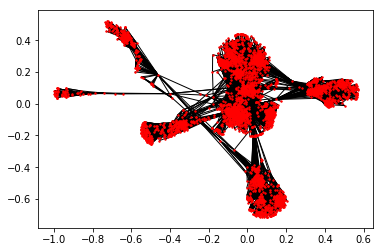

In [148]:
nx.draw_networkx(fb, with_labels=False, node_size=2)

## Visualize subgraphs

In [131]:
# assign selected subgraph to a new graph
neigbors_of_most_central = list(fb.neighbors('107'))
neigbors_of_most_central.append('107')
fb_sub = fb.subgraph(neigbors_of_most_central)

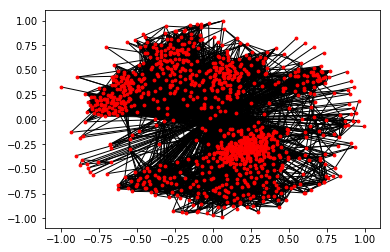

<Figure size 72x72 with 0 Axes>

In [140]:
# sp = nx.spring_layout(fb_sub)
nx.draw_networkx(fb_sub, with_labels=False, node_size=8)
plt.figure(figsize=(1,1))
plt.show()

### Queries On Networks

In [ ]:
# obtain a list of nodes with a certain property
sub_nodes = [n[0] for n in fb.nodes(data=True) if d['attribute'] == 'what we are interested in']

In [ ]:
# obtain a list of edges with a certain property
sub_edges = [edge for edge in fb.edges(data=True) if d['attribute'] == 'what we are interested in']

### Clustering coefficient
https://en.wikipedia.org/wiki/Clustering_coefficient

In [145]:
# check clustering coefficient
cc = nx.clustering(fb)
avg_cc_fb = sum(cc.values()) / len(cc)
print("Facebook network clustering coefficient:", avg_cc_fb)

Facebook network clustering coefficient: 0.6055467186200876


Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


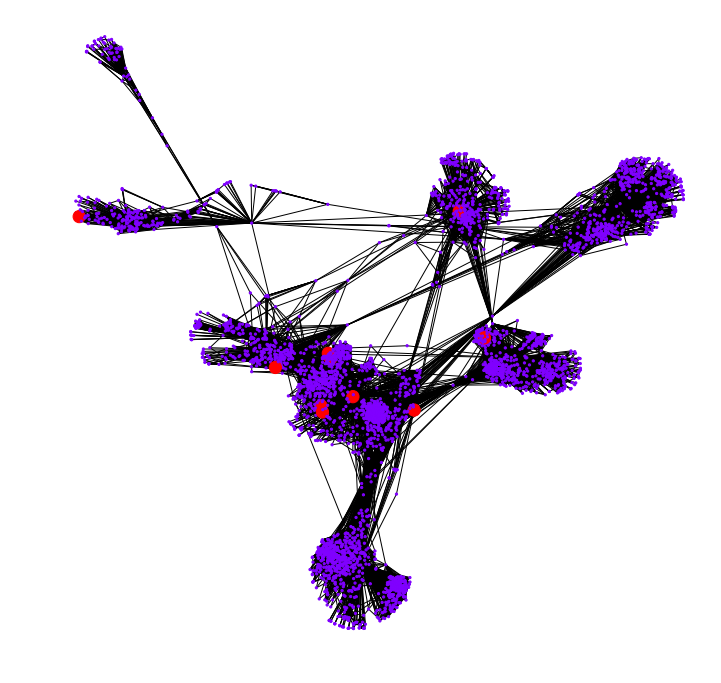

In [37]:
'''Exploratory Data Analysis'''
fb = nx.read_edgelist('../facebook_combined.txt', create_using=nx.Graph(), nodetype=int)
print(nx.info(fb))

'''Parallel Betweenness Centrality'''
from multiprocessing import Pool
import itertools

spring_pos = nx.spring_layout(fb)
plt.figure(figsize=(12,12))


def partitions(nodes, n):
    # '''Partitions the nodes into n subsets'''
    nodes_iter = iter(nodes)
    while True:
        partition = tuple(itertools.islice(nodes_iter,n))
        if not partition:
            return
        yield partition


def btwn_pool(G_tuple):
    return nx.betweenness_centrality_source(*G_tuple)


def between_parallel(G, processes=None):
    p = Pool(processes=processes)
    part_generator = 4 * len(p._pool)
    node_partitions = list(partitions(G.nodes(), int(len(G) / part_generator)))
    num_partitions = len(node_partitions)

    bet_map = p.map(btwn_pool,
                    zip([G] * num_partitions,
                        [True] * num_partitions,
                        [None] * num_partitions,
                        node_partitions))

    bt_c = bet_map[0]
    for bt in bet_map[1:]:
        for n in bt:
            bt_c[n] += bt[n]
    return bt_c


bt = between_parallel(fb)
top = 10

max_nodes = sorted(bt.items(), key = lambda v: -v[1])[:top]
bt_values = [5] * len(fb.nodes())
bt_colors = [0] * len(fb.nodes())
for max_key, max_val in max_nodes:
    bt_values[max_key] = 150
    bt_colors[max_key] = 2

plt.axis("off")
nx.draw_networkx(fb, pos=spring_pos, cmap=plt.get_cmap("rainbow"), node_color=bt_colors, node_size=bt_values,
                 with_labels=False)

plt.show()

In [14]:
max_nodes

[(107, 0.48051807855601464),
 (1684, 0.3377974497301952),
 (3437, 0.23611535735892847),
 (1912, 0.22929533958687442),
 (1085, 0.14901509211665434),
 (0, 0.14630592147442867),
 (698, 0.11533045020561),
 (567, 0.09631033121856326),
 (58, 0.0843602059079653),
 (428, 0.06430906239323836)]